# Statistic measures and metrics high-level review

In [10]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('age_children_income_1000.csv')

## EDA

In [3]:
df.head()

,age,number_of_children,income
0,42.772420,0,34396.537188
1,29.561090,0,183350.052521
2,54.380735,0,53689.856555
3,42.551689,0,109080.913926
4,38.713080,0,153612.343419


In [4]:
df['number_of_children'].value_counts()

0    658
1    226
2     94
3     20
5      1
4      1
Name: number_of_children, dtype: int64

In [5]:
df['number_of_children'].value_counts(normalize=True)

0    0.658
1    0.226
2    0.094
3    0.020
5    0.001
4    0.001
Name: number_of_children, dtype: float64

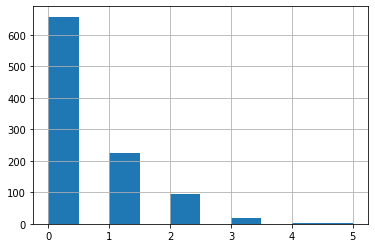

In [9]:
# histogram
df['number_of_children'].hist();

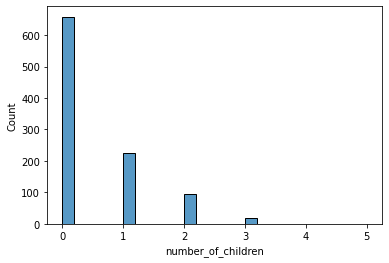

In [13]:
sns.histplot(df['number_of_children']);

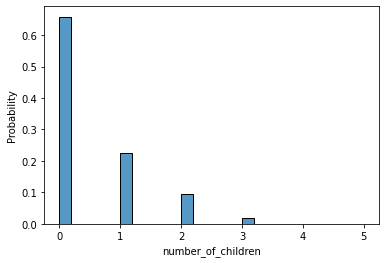

In [24]:
sns.histplot(df['number_of_children'],stat='probability');

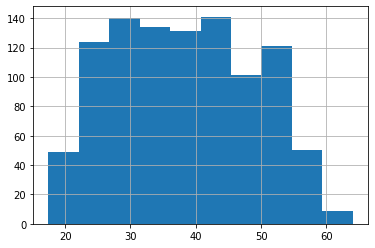

In [17]:
df['age'].hist();

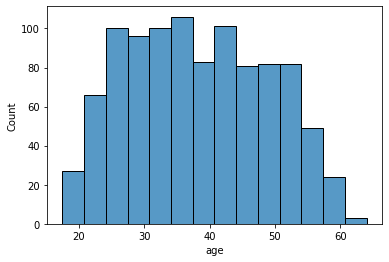

In [18]:
sns.histplot(df['age']);

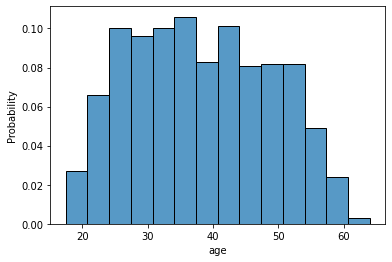

In [19]:
sns.histplot(df['age'], stat='probability');

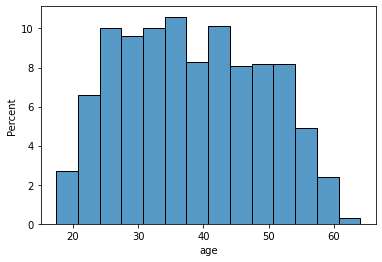

In [23]:
sns.histplot(df['age'], stat='percent');

In [25]:
# adding new column for age bins. 10 bins to rank people's age
df['age_bin'] = pd.cut(df['age'],10)

In [26]:
df.head()

,age,number_of_children,income,age_bin
0,42.772420,0,34396.537188,"(40.743, 45.401]"
1,29.561090,0,183350.052521,"(26.766, 31.425]"
2,54.380735,0,53689.856555,"(50.06, 54.719]"
3,42.551689,0,109080.913926,"(40.743, 45.401]"
4,38.713080,0,153612.343419,"(36.084, 40.743]"


In [27]:
df.groupby('age_bin')['age'].count()

age_bin
(17.402, 22.107]     49
(22.107, 26.766]    124
(26.766, 31.425]    140
(31.425, 36.084]    134
(36.084, 40.743]    131
(40.743, 45.401]    141
(45.401, 50.06]     101
(50.06, 54.719]     121
(54.719, 59.378]     50
(59.378, 64.037]      9
Name: age, dtype: int64

In [28]:
df['number_of_children'].mean()

0.483

In [40]:
df['number_of_children'].value_counts()

0    658
1    226
2     94
3     20
5      1
4      1
Name: number_of_children, dtype: int64

In [41]:
# most common value for number of children. Top1. 
df['number_of_children'].mode()

0    0
dtype: int64

In [29]:
df['age'].mean()

38.31925590719966

In [31]:
df['income'].mean()

129415.74637843431

In [34]:
df['income'].median()

114586.57093898312

In [38]:
df['income'].agg(['mean','median'])

mean      129415.746378
median    114586.570939
Name: income, dtype: float64

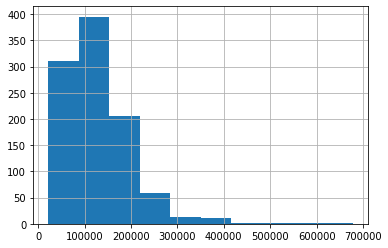

In [39]:
df['income'].hist();

In [42]:
df['income'].quantile(0.5)

114586.57093898312

In [43]:
df['age'].rank(pct=True).head()

0    0.639
1    0.257
2    0.936
3    0.634
4    0.521
Name: age, dtype: float64

In [44]:
df['pct_age'] = df['age'].rank(pct=True)

In [45]:
df.head()

,age,number_of_children,income,age_bin,pct_age
0,42.772420,0,34396.537188,"(40.743, 45.401]",0.639
1,29.561090,0,183350.052521,"(26.766, 31.425]",0.257
2,54.380735,0,53689.856555,"(50.06, 54.719]",0.936
3,42.551689,0,109080.913926,"(40.743, 45.401]",0.634
4,38.713080,0,153612.343419,"(36.084, 40.743]",0.521


In [46]:
(df['age'] < 42.772420).mean()

0.638

63% of people are younger than this person(first person in the table)

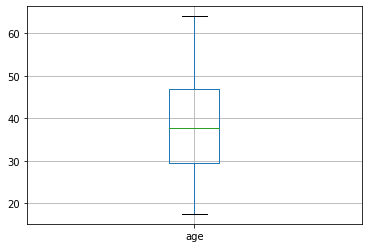

In [47]:
df.boxplot('age');

Box plot is used to visualise the distribution. Green line represents the median. Bottom line represents first quartile. Upper line - 3rd quartile.Whiskers cover 1.5 Inter Quartile Range (IQR). Data points outside the wiskers are the outliers.

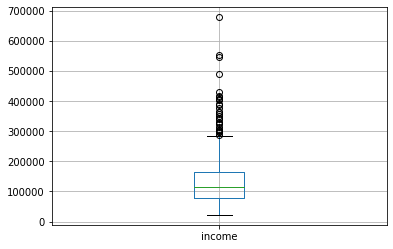

In [48]:
df.boxplot('income');

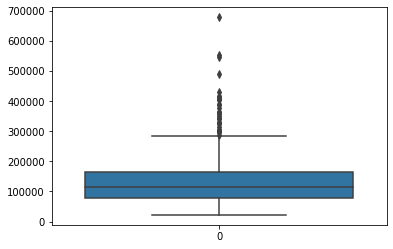

In [50]:
sns.boxplot(data= df['income']);

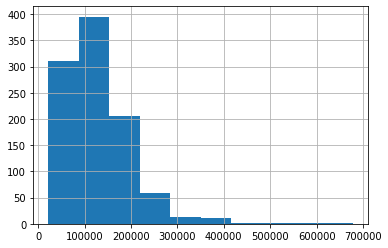

In [51]:
df['income'].hist();

In [52]:
df['income'].describe()

count      1000.000000
mean     129415.746378
std       71251.620971
min       21943.855414
25%       79594.040400
50%      114586.570939
75%      162888.891081
max      678006.351857
Name: income, dtype: float64

Calculating distance from the mean

In [53]:
df['income'] - df['income'].mean()

0     -95019.209190
1      53934.306143
2     -75725.889823
3     -20334.832452
4      24196.597041
           ...     
995     -767.823506
996   -62211.214705
997    10017.011605
998     8110.705955
999    19033.514759
Name: income, Length: 1000, dtype: float64

Visualizing distance from the mean distribution

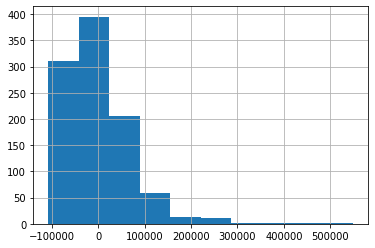

In [54]:
(df['income'] - df['income'].mean()).hist();

Calculate average distance from average distance

In [55]:
(df['income'] - df['income'].mean()).abs().mean()

51910.29730549474

In [56]:
df['income'].describe()

count      1000.000000
mean     129415.746378
std       71251.620971
min       21943.855414
25%       79594.040400
50%      114586.570939
75%      162888.891081
max      678006.351857
Name: income, dtype: float64

Standard deviation is not a mean deviation. Module leads to issues with derivative. That's why square was selected instead. It is variance.

Variance

In [57]:
((df['income']- df['income'].mean())**2).mean()

5071716697.45695

In [58]:
np.sqrt(((df['income'] - df['income'].mean())**2).mean())

71215.98624927517

In order to calculate standard deviation for sample, we need to divide to n-1 observations.

In [60]:
np.sqrt(((df['income'] - df['income'].mean())**2).sum() / (len(df)-1))

71251.62097066913

In the initial analysis standard deviation is not very useful metric. It just shows the difference of data points across the mean value. It is the metric of spread/variation.

### MAE – Mean Absolute Error or MAD – Mean. Absolute Deviation

Mean absolute error is lower than standard deviation. This is because if the squares used for calculation of the std. Square is not a linear function and thus in cases where fat tales are present, they have higher weight. 

In [62]:
(df['income'] - df['income'].mean()).abs().mean()

51910.29730549474

### Correlation

In [63]:
df[['age','income']].corr()

,age,income
age,1.000000,-0.048164
income,-0.048164,1.000000


Correlation is a mathematical metric that is based on squares. In some cases it is a useful metric, but it is important to remember that it can only show/"catch" linear relations that are not that often present in real life data.
All issues related to squares are also applicable for correlation.
To sum up, correlation should be used only in cases when we are sure that variables have a linear relationships.

### Summary report

It is a good practise to start analysis with summary reports creation.

In [64]:
df.groupby('age_bin')['income'].agg(['count','mean','median'])

,count,mean,median
age_bin,,,
"(17.402, 22.107]",49,104319.382165,88163.526875
"(22.107, 26.766]",124,133775.791324,125960.906191
"(26.766, 31.425]",140,130575.738767,114947.477353
"(31.425, 36.084]",134,135654.848704,118368.874351
"(36.084, 40.743]",131,134457.081592,128647.922872
"(40.743, 45.401]",141,139697.676942,123441.920529
"(45.401, 50.06]",101,142814.622910,122199.047306
"(50.06, 54.719]",121,112563.104588,95443.103632
"(54.719, 59.378]",50,104040.538214,91602.734609


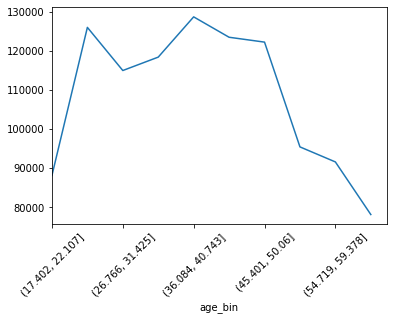

In [65]:
df.groupby('age_bin')['income'].median().plot(rot=45,xlim=0);

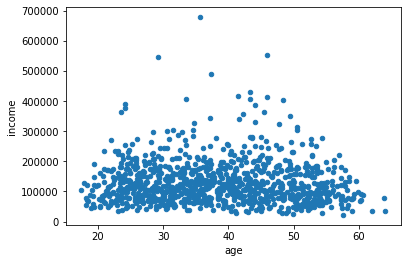

In [66]:
df.plot(x='age',y='income',kind='scatter');

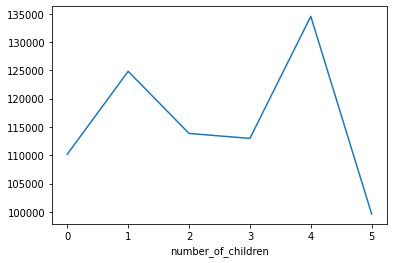

In [67]:
df.groupby('number_of_children')['income'].median().plot();

In [68]:
df[['number_of_children','income']].corr()

,number_of_children,income
number_of_children,1.000000,0.065774
income,0.065774,1.000000


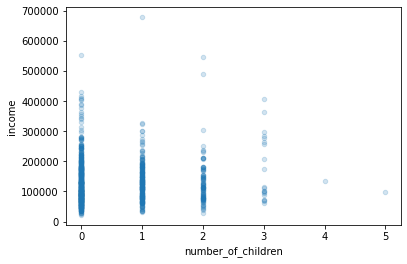

In [69]:
df.plot(x='number_of_children',y='income',kind='scatter',alpha=0.2);

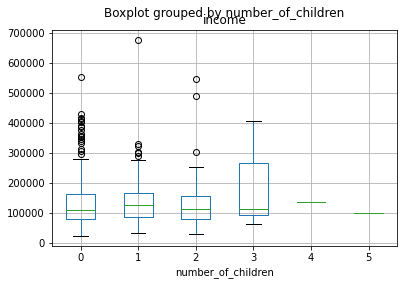

In [71]:
df.boxplot('income',by='number_of_children');